<a href="https://colab.research.google.com/github/ueda-keisuke/shogi_ai/blob/main/%EF%BC%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cshogi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.6 MB 5.2 MB/s 


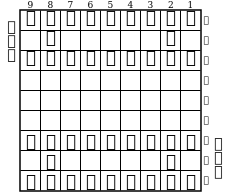

In [3]:
import cshogi
board = cshogi.Board()
board

In [5]:
for move in board.legal_moves:
  print(cshogi.move_to_usi(move))

1g1f
2g2f
3g3f
4g4f
5g5f
6g6f
7g7f
8g8f
9g9f
1i1h
9i9h
3i3h
3i4h
7i6h
7i7h
2h1h
2h3h
2h4h
2h5h
2h6h
2h7h
4i3h
4i4h
4i5h
6i5h
6i6h
6i7h
5i4h
5i5h
5i6h


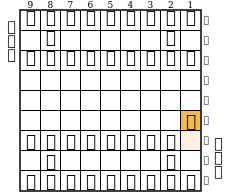

In [6]:
move = list(board.legal_moves)[0]
board.push(move)
board

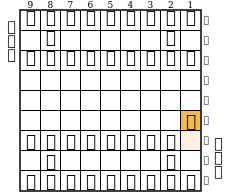

In [7]:
move = board.push_usi('7g7f')
board

In [8]:
board.pop()

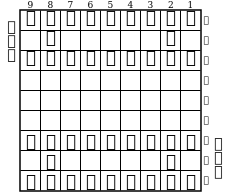

In [9]:
board

In [10]:
board.piece_type(cshogi.A1)

2

In [11]:
board.pieces[cshogi.A1]

18

In [12]:
board.pieces_in_hand[cshogi.BLACK][cshogi.HPAWN]

0

In [16]:
mv16 = cshogi.move16(move)
move = board.move_from_move16(mv16)

In [19]:
!git clone https://github.com/TadaoYamaoka/python-dlshogi2
%cd python-dlshogi2/
!pip install -e .

Cloning into 'python-dlshogi2'...
remote: Enumerating objects: 209, done.
remote: Counting objects: 100% (16/16), done.
remote: Total 209 (delta 15), reused 15 (delta 15), pack-reused 193
Receiving objects: 100% (209/209), 313.81 MiB | 34.83 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Checking out files: 100% (23/23), done.
/content/python-dlshogi2/python-dlshogi2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/python-dlshogi2/python-dlshogi2
  Running setup.py develop for python-dlshogi2


将棋 AI モデルの実装

In [20]:
def make_input_features(board, features):
  #入力特徴量を0に初期化
  features.fill(0)

  if board.turn == cshogi.BLACK:
    board.piece_plains(features)
    pieces_in_hand = board.pieces_in_hand
  else:
    board.piece_planes_rotate(features)
    pieces_in_hand = reversed(board.pieces_in_hand)
  
  i = 28
  for hands in pieces_in_hand:
    for num, max_num, in zip(hands, cshogi.MAX_PIECES_IN_HAND):
      features[i:i+num].fill(1)
      i += max_num

In [23]:
def make_move_label(move, color):
  if not cshogi.move_is_drop(move):
    to_sq = cshogi.move_to(move)
    from_sq = cshogi.move_from(move)

    #後手の場合は盤面を回転
    if color == WHITE:
      to_sq = 80 - to_sq
      from_sq = 80 - from_sq

    # 移動方向
    to_y, to_x = divmod(to_sq, 9)
    from_y, from_x = divmod(from_sq, 9)
    dir_x = to_x - from_x
    dir_y = to_y - from_y
    if dir_y < 0:
      if dir_x == 0:
        move_direction = UP
      elif dir_x < 0:
        move_direction = UP_LEFT
      else:  # dir_x > 0
        move_direction = UP_RIGHT

    elif dir_y == 0:
      if dir_x < 0:
        move_direction = LEFT
      else:  # dir_x > 0
        move_direction = RIGHT

    elif dir_y > 0:
      if dir_x == 0:
        move_direction = DOWN
      elif dir_x < 0:
        move_direction = DOWN_LEFT
      else:  # dir_x > 0
        move_direction = DOWN_RIGHT

    else:  # dir_y == -2
      if dir_x == -1:
        move_direction = UP2_LEFT
      else:  # dir_x == 1
        move_direction = UP2_RIGH